# HMM analysis

Here we will construct and analyze HMM models retrieved from MSAs. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.

## Load the data

We are working only with the disordered regions, thus we should keep only the related information.


In [2]:
# Importing the libraries and functions
from functions import *

In [2]:
# Dataframe of disordered regions
disordered = pd.read_csv("disordered_df.csv")
print(f"The number of rows with the disordered regions: {len(disordered)}")
# disordered.head(5)

The number of rows with the disordered regions: 4506


In [3]:
# Obtain the information about one Uniprot query ID
%store -r id_dis i
id_dis = id_dis
i = i
curated_disprot = pd.read_csv("curated_disprot.csv")
curated_query = curated_disprot[curated_disprot['acc'] == id_dis]

print(f"The number of disordered regions in the {id_dis} protein: {len(curated_query)}")
curated_query

The number of disordered regions in the P00742 protein: 1


,acc,evidence,feature,source,start,end,length
2818,P00742,curated,disorder,disprot,90,126,37


## hmmsearch results analysis

After performing `hmmsearch` against RP 15%, we retrieve the dataframe `hmmsearch_results` with the statistics.

In [4]:
# Retrieve the dataframe with the hmmsearch results
%store -r hmmsearch_results
print(f"Number of hmmsearch hits for the {i} disordered region of the {id_dis} protein:", len(hmmsearch_results))
hmmsearch_results[:10]

Number of hmmsearch hits for the 1 disordered region of the P00742 protein: 6989


,E-value,score,bias,E-value,score,bias,exp,N,Sequence,hmm_from,hmm_to,hmm_length
0,0,6158.1,5935.7,1.1e-06,37.7,6.3,378.2,376,A0A7M7NU54,1,35,35
1,0,3140.6,2587.7,1.3e-07,40.7,6.4,148.9,148,A0A7I8W901,1,35,35
2,0,1943.3,1271.1,8.7e-09,44.4,9.5,83.5,80,A0A7M7MXY5,1,33,33
3,0,1848.6,2423.2,3.5e-06,36.1,6.2,150.4,143,A0A7M7P8Y1,1,35,35
4,0,1685.2,1183.7,5.9e-08,41.8,11.9,66.0,66,A0A7M5X8A8,4,34,31
5,0,1653.5,1492.3,1.9e-07,40.2,7.8,99.4,93,A0A7M7T3R9,1,34,34
6,0,1651.4,1070.2,3e-07,39.5,10.4,69.1,69,A0A6P4XP98,1,34,34
7,0,1499.0,1017.7,2.2e-08,43.2,8.1,65.1,63,R7V001,1,34,34
8,0,1482.7,1715.4,8.3e-08,41.3,11.9,99.4,99,A0A8B8EK18,1,34,34
9,0,1461.0,852.9,5e-09,45.2,8.5,53.1,53,A0A2R2MKN1,1,33,33


In [5]:
# Check if the query sequence was found with hmmsearch
hmmsearch_results[hmmsearch_results['Sequence'] == id_dis]

,E-value,score,bias,E-value,score,bias,exp,N,Sequence,hmm_from,hmm_to,hmm_length
2742,2.5e-20,81.4,12.9,2.5e-20,81.4,12.9,3.0,1,P00742,1,37,37


In [6]:
# Calculate the number of overlaps between HMM and alignment regions
# overlap_count = ((hmmsearch_results['hmm_from'] <= hmmsearch_results['ali_to']) & (hmmsearch_results['hmm_to'] >= hmmsearch_results['ali_from'])).sum()

# Print the number of overlaps
# print(f'Overall number of hits for the {i} region of the {id_dis} protein: {len(hmmsearch_results)}')
# print(f'Number of overlaps between HMM and alignment regions: {overlap_count}')
# plot_overlaps(hmmsearch_results, curated_query, id_dis)

### HMM and Pfam comparison

We took the results of `hmmsearch` and performed a search against `protein2ipr` database. Thus we obtained the list of the Pfam domains corresponding to the results from `hmmsearch`.

In [294]:
# Create a dataframe of Pfam regions
pfam_overlap = pd.read_csv(f"results/pfam/pfam_overlap_{id_dis}.csv")
print(f"The number of regions for the {i} disordered region of the {id_dis} protein in Protein2ipr:", len(pfam_overlap))
print("The retrieved Pfam domains:", list(set(pfam_overlap['pfam_id'])))
pfam_overlap

The number of regions for the 1 disordered region of the Q8IW19 protein in Protein2ipr: 30
The retrieved Pfam domains: ['PF02171', 'PF08808', 'PF00460', 'PF00361', 'PF16488', 'PF17913', 'PF00662', 'PF06429', 'PF07559', 'PF08699', 'PF06330', 'PF13785', 'PF02170', 'PF16486', 'PF03706', 'PF10283', 'PF00091']


,uniprot_id,ipr_id,description,pfam_id,start_pos,end_pos,length
0,A0A0F6Q5G6,IPR003008,"Tubulin/FtsZ, GTPase domain",PF00091,1,103,103
1,A0A0Q8IW19,IPR014914,RES domain,PF08808,74,218,145
2,A0A1F6Q5G6,IPR022791,Lysylphosphatidylglycerol synthetase/glycosylt...,PF03706,28,328,301
3,A0A1Q8IW19,IPR001444,"Flagellar basal body rod protein, N-terminal",PF00460,5,35,31
4,A0A1Q8IW19,IPR010930,"Flagellar basal-body/hook protein, C-terminal ...",PF06429,316,392,77
5,A0A1Q8IW19,IPR011491,Flagellar hook protein FlgE,PF07559,176,276,101
6,A0A2K5VR45,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26
7,A0A2K5VR45,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22
8,A0A2K5VR45,IPR041388,"PNK, FHA domain",PF17913,20,99,80
9,A0A2K6T215,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,365,390,26


In [295]:
pfam_overlap[pfam_overlap['uniprot_id'] == id_dis]

,uniprot_id,ipr_id,description,pfam_id,start_pos,end_pos,length
26,Q8IW19,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,376,401,26
27,Q8IW19,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,442,25
28,Q8IW19,IPR041388,"PNK, FHA domain",PF17913,21,100,80


Then we compare the HMM and Pfam model length with the Disprot.

In [296]:
# Compare the length of the regions
d_len = curated_query['length'].iloc[0] # change from 0 to another value if necessary
hmm_len = hmmsearch_results[hmmsearch_results['Sequence'] == id_dis]['hmm_length'].iloc[0]
pfam_len = pfam_overlap[pfam_overlap['uniprot_id'] == id_dis]['length'].iloc[0] # change from 0 to another value if necessary

print('The length of the DisProt region:', d_len, '\n'
      'The length of the HMM:', hmm_len, '\n'
      'The length of the Pfam:', pfam_len)

The length of the DisProt region: 22 
The length of the HMM: 22 
The length of the Pfam: 26


In [297]:
# Compare the ratios
hmm_disprot_ratio = f"{hmm_len/d_len:.2f}"
pfam_disprot_ratio = f"{pfam_len/d_len:.2f}"

print('The ratio of HMM to DisProt length', hmm_disprot_ratio, '\n'
     'The ratio of Pfam to DisProt length', pfam_disprot_ratio)

The ratio of HMM to DisProt length 1.00 
The ratio of Pfam to DisProt length 1.18


In [298]:
# Select an intersection between HMM and DisProt
# def filter_hmm_data(id_dis, i):
#     hmm_overlap_filtered = hmmsearch_results[~hmmsearch_results.apply(lambda x: any(
#         (x['hmm_from'] > curated_region['end']) or (x['hmm_to'] < curated_region['start'])
#         for _, curated_region in curated_query.iterrows()), axis=1)]
#     if len(hmm_overlap_filtered) == 0:
#         print(f"No intersections with the {id_dis}_{i} region found")
#     return hmm_overlap_filtered

filtered_hmm = filter_hmm_data(id_dis, i)
print(f"The number of sequences intersected with the {i} disordered region of the {id_dis} protein:", len(filtered_hmm))
filtered_hmm

No intersections with the Q8IW19_1 region found
The number of sequences intersected with the 1 disordered region of the Q8IW19 protein: 0


,E-value,score,bias,E-value,score,bias,exp,N,Sequence,hmm_from,hmm_to,hmm_length


In [299]:
# Select an intersection between Pfam and DisProt
# def filter_pfam_data(id_dis, i):
#     pfam_overlap_filtered = pfam_overlap[~pfam_overlap.apply(lambda x: any(
#         (x['start_pos'] > curated_region['end']) or (x['end_pos'] < curated_region['start'])
#         for _, curated_region in curated_query.iterrows()), axis=1)]
#     if len(pfam_overlap_filtered) == 0:
#         print(f"No intersections with the {id_dis}_{i} region found")
#     return pfam_overlap_filtered

filtered_pfam = filter_pfam_data(id_dis, i)
print(f"The number of sequences intersected with the {i} disordered region of the {id_dis} protein:", len(filtered_pfam))
print("The retrieved Pfam regions:", list(set(filtered_pfam['pfam_id'])))
filtered_pfam

The number of sequences intersected with the 1 disordered region of the Q8IW19 protein: 1
The retrieved Pfam regions: ['PF02170']


,uniprot_id,ipr_id,description,pfam_id,start_pos,end_pos,length
13,A0A5S9WGV8,IPR003100,PAZ domain,PF02170,366,487,122


In [300]:
# # Plot the overlap between disprot region and Pfam
# def plot_overlapping_proteins(pfam_overlap, curated_query, id_dis, i):
#     unique_uniprot_ids = pfam_overlap['uniprot_id'].unique()

#     if len(unique_uniprot_ids) == 0:
#         print("No overlapping regions to plot.")
#         return

#     # Plot overlapping regions
#     fig, ax = plt.subplots(figsize=(10, 0.25 * len(unique_uniprot_ids)))

#     # Plot the regions
#     ax.hlines(pfam_overlap['uniprot_id'], pfam_overlap['start_pos'], pfam_overlap['end_pos'], linewidth=10, color='lightblue', label='Pfam Region')
#     ax.hlines(pfam_overlap['uniprot_id'], curated_query['start'], curated_query['end'], linewidth=10, color='lightgreen', label='Disprot Region')

#     ax.set_yticks(pfam_overlap['uniprot_id'])
#     ax.set_yticklabels(pfam_overlap['uniprot_id'])

#     # Create a custom range for the y-axis based on the unique 'uniprot_id' values
#     y_axis_range = range(len(unique_uniprot_ids))
#     ax.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    
#     # Add annotations at specific positions
#     for idx, row in pfam_overlap.iterrows():
#         x_pos = (row['start_pos'] + row['end_pos']) / 2  # Calculate the x position for annotation
#         y_pos = row['uniprot_id']  # Use the 'uniprot_id' as the y position
#         ax.annotate(row['pfam_id'], (x_pos, y_pos), ha='center', va='center', fontsize=8)

#     plt.title(f'Overlaps between the {i} disordered region of the {id} protein with the other proteins')
#     plt.xlabel('Position')
#     plt.ylabel('UniProt ID')
#     plt.legend(loc='upper left')
#     plt.grid(True)
#     plt.show()

In [7]:
# # Plot Pfam and Disprot regions
# plot_overlapping_proteins(pfam_overlap, curated_query, id, i)

In [8]:
# # Plot only the intercepting regions
# plot_overlapping_proteins(filtered_pfam, curated_query, id, i)

In [44]:
stats_hmm_pfam = pd.read_csv("stats_hmm_pfam.csv", sep=';')
stats_hmm_pfam[:10]

,id,region,disprot_len,disprot_pos,hmm_len,hmm_pos,pfam_len,pfam_pos,overlap_reg,overlap_len,overlap_perc,domains,name,num_seq_msa
0,Q9H832,1,99,1-99,99,1-99,129,103-231,-,-,-,IPR000608,Ubiquitin-conjugating enzyme E2,200
1,Q9H832,2,28,327-354,28,1-28,129,103-231,-,-,-,IPR000608,Ubiquitin-conjugating enzyme E2,200
2,Q8IW19,1,22,399-420,22,1-22,26,376-401,399-401,3,"0,14",IPR019406,"Aprataxin and PNK-like factor, PBZ domain",200
3,Q8IW19,1,22,399-420,22,1-22,25,418-442,418-420,3,"0,14",IPR019406,"Aprataxin and PNK-like factor, PBZ domain",200
4,Q8IW19,2,62,450-511,62,1-62,80,21-100,-,-,-,IPR041388,"PNK, FHA domain",200
5,Q99967,1,50,220-269,50,1-50,-,-,-,-,-,-,-,200
6,Q9CXY6,1,16,29-44,16,1-16,234,104-337,-,-,-,IPR006561,DZF domain,200
7,Q9CXY6,2,44,347-390,44,1-44,234,104-337,-,-,-,IPR006561,DZF domain,200
8,Q8R464,1,96,25-120,96,1-96,93,30-122,30-120,91,"0,95",IPR013106,Immunoglobulin V-set domain,200
9,Q8R464,1,96,25-120,96,1-96,77,130-206,-,-,-,IPR013162,"CD80-like, immunoglobulin C2-set",200


In [46]:
# stats_hmm_pfam['overlap_perc'] = stats_hmm_pfam['overlap_perc'].str.replace(',', '.').astype(float)
stats_hmm_pfam = stats_hmm_pfam[stats_hmm_pfam['overlap_perc'] != '-']
stats_hmm_pfam

,id,region,disprot_len,disprot_pos,hmm_len,hmm_pos,pfam_len,pfam_pos,overlap_reg,overlap_len,overlap_perc,domains,name,num_seq_msa
2,Q8IW19,1,22,399-420,22,1-22,26,376-401,399-401,3,"0,14",IPR019406,"Aprataxin and PNK-like factor, PBZ domain",200
3,Q8IW19,1,22,399-420,22,1-22,25,418-442,418-420,3,"0,14",IPR019406,"Aprataxin and PNK-like factor, PBZ domain",200
8,Q8R464,1,96,25-120,96,1-96,93,30-122,30-120,91,"0,95",IPR013106,Immunoglobulin V-set domain,200
16,Q9H0E2,1,53,1-53,53,1-53,102,53-154,53-53,1,"0,02",IPR000008,C2 domain,200
19,Q5VZK9,1,16,1005-1020,16,1-16,294,786-1079,1005-1020,16,"1,00",IPR031943,"CARMIL, C-terminal domain",200


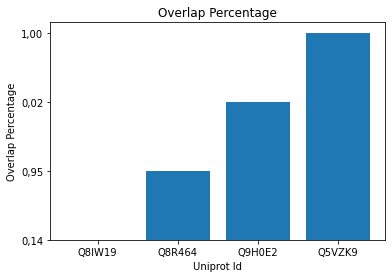

In [47]:
# Create a bar plot of overlap percentage
plt.bar(stats_hmm_pfam['id'], stats_hmm_pfam['overlap_perc'])
plt.xlabel('Uniprot Id')
plt.ylabel('Overlap Percentage')
plt.title('Overlap Percentage')
plt.show()

In [49]:
# Extract start and end positions
stats_hmm_pfam['disprot_start'] = stats_hmm_pfam['disprot_pos'].str.split('-').str[0].astype(int)
stats_hmm_pfam['disprot_end'] = stats_hmm_pfam['disprot_pos'].str.split('-').str[1].astype(int)
stats_hmm_pfam['pfam_start'] = stats_hmm_pfam['pfam_pos'].str.split('-').str[0].astype(int)
stats_hmm_pfam['pfam_end'] = stats_hmm_pfam['pfam_pos'].str.split('-').str[1].astype(int)

In [59]:
# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 0.25 * len(stats_hmm_pfam)))

# for index, row in stats_hmm_pfam.iterrows():
#     # Extract start and end positions for DisProt and Pfam domains
#     disprot_start, disprot_end = map(int, row['disprot_pos'].split('-'))
#     pfam_start, pfam_end = map(int, row['pfam_pos'].split('-'))

#     # Plot the DisProt and Pfam regions
#     ax.hlines(index, disprot_start, disprot_end, linewidth=10, color='lightgreen')
#     ax.hlines(index, pfam_start, pfam_end, linewidth=10, color='lightblue')

# # Set y-ticks and labels
# ax.set_yticks(range(len(stats_hmm_pfam)))
# ax.set_yticklabels(stats_hmm_pfam['id'])

# # Set plot title
# plt.title('Overlapping Regions between DisProt and Pfam')

# # Add legend outside the loop to specify labels explicitly
# ax.legend(['DisProt Region', 'Pfam Region'])

# plt.xlabel('Position')
# # plt.ylabel('ID')
# plt.grid(True)

# # Show the plot
# plt.show()


In [60]:
pfam_hmm = pd.read_csv('results/pfam/pfam_hmm.csv')
pfam_hmm

,ipr_id,description,pfam_id,start_pos,end_pos,length,Sequence,hmm_from,hmm_to,hmm_length
0,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26,A0A2K5VR45,1,62,62
1,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26,A0A2K5VR45,1,22,22
2,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22,A0A2K5VR45,1,62,62
3,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22,A0A2K5VR45,1,22,22
4,IPR041388,"PNK, FHA domain",PF17913,20,99,80,A0A2K5VR45,1,62,62
...,...,...,...,...,...,...,...,...,...,...
4549,IPR003892,Ubiquitin system component CUE,PF02845,236,276,41,V4A7B4,7,50,44
4550,IPR000008,C2 domain,PF00168,86,187,102,V8NJ04,1,53,53
4551,IPR003892,Ubiquitin system component CUE,PF02845,263,302,40,V8NJ04,1,53,53
4552,IPR000008,C2 domain,PF00168,65,166,102,W4Z0N8,1,48,48


In [61]:
pfam_hmm[pfam_hmm['Sequence'] == 'A0A2K5VR45']

,ipr_id,description,pfam_id,start_pos,end_pos,length,Sequence,hmm_from,hmm_to,hmm_length
0,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26,A0A2K5VR45,1,62,62
1,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26,A0A2K5VR45,1,22,22
2,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22,A0A2K5VR45,1,62,62
3,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22,A0A2K5VR45,1,22,22
4,IPR041388,"PNK, FHA domain",PF17913,20,99,80,A0A2K5VR45,1,62,62
5,IPR041388,"PNK, FHA domain",PF17913,20,99,80,A0A2K5VR45,1,22,22
2152,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26,A0A2K5VR45,1,62,62
2153,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26,A0A2K5VR45,1,22,22
2154,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22,A0A2K5VR45,1,62,62
2155,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22,A0A2K5VR45,1,22,22
